In [1]:
import os
import numpy as np
from collections import defaultdict
import matplotlib.pyplot as plt
from PIL import Image
import tensorflow as tf

import warnings
warnings.filterwarnings('ignore')

In [2]:
PROJ_ROOT = os.pardir
imgs_folder = os.path.join(PROJ_ROOT, 'Images')
seg_imgs_folder = os.path.join(PROJ_ROOT, 'SegmentationClass')
splits_folder = os.path.join(PROJ_ROOT, 'Segmentation')

In [3]:
files = defaultdict(list)
for split in ['train', 'val']:
    path = os.path.join(splits_folder, split + '.txt')
    file_list = tuple(open(path, 'r'))
    file_list = [file_id.rstrip() for file_id in file_list]
    files[split] = file_list

In [4]:
print(len(files['train']))
print(len(files['val']))

1464
1449


In [5]:
def load_img(name, img_path, seg_path):
    img = Image.open(img_path + '/' + name + '.jpg')
    img = img.convert('RGB')
    seg_img = Image.open(seg_path + '/' + name + '.png')
    seg_img = seg_img.convert('RGB')
    
    img = np.array(img)
    img = img / 255.0
    seg_img = np.array(seg_img)
    
    return img, seg_img  

In [6]:
def show_image_seg(img, seg_img):
    fig = plt.figure(figsize=(12, 6))
    plt.subplot(1, 2, 1)
    plt.title('Image')
    plt.imshow(img)
    plt.subplot(1, 2, 2)
    plt.title('Segmentation')
    plt.imshow(seg_img)

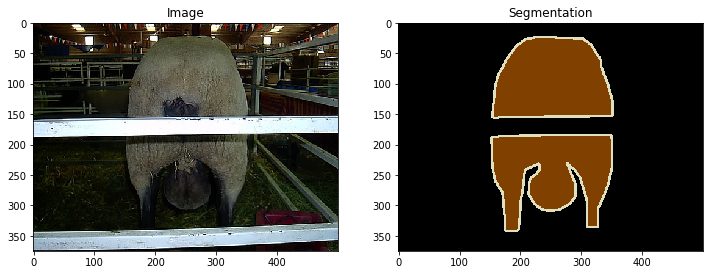

In [7]:
ex_img, ex_seg_img = load_img(files['train'][54],
                              imgs_folder, seg_imgs_folder)

show_image_seg(ex_img, ex_seg_img)